# Mini-Projet Ia (Classification)
## Risques Cardiovasculaires

#### Réalisé par:
- **Mohammed EZZOUAK**
- **Abderahim EL Otmani**
- **Ayoub AKOUBRI**
### Encadré par:
- **Pr. Y. EL YOUNOUSSI**

### Introduction du projet
Dans ce projet, nous allons travailler sur un dataset qui contient des informations sur les risques cardiovasculaires. Notre objectif est de prédire si un patient est à risque de maladie cardiovasculaire ou non.


### Importation des bibliothèques

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Chargement des données

In [2]:
df = pd.read_csv('data/Cardiovascular_Diseases.csv',low_memory=False)

## Compréhension des Données
### Aperçu des Données

In [3]:
df.head(10)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0
5,Good,Within the past year,No,No,No,No,Yes,No,Yes,Male,60-64,183.0,154.22,46.11,No,0.0,12.0,12.0,12.0
6,Fair,Within the past year,Yes,Yes,No,No,No,No,Yes,Male,60-64,175.0,69.85,22.74,Yes,0.0,16.0,8.0,0.0
7,Good,Within the past year,Yes,No,No,No,No,No,Yes,Female,65-69,165.0,108.86,39.94,Yes,3.0,30.0,8.0,8.0
8,Fair,Within the past year,No,No,No,No,Yes,No,No,Female,65-69,163.0,72.57,27.46,Yes,0.0,12.0,12.0,4.0
9,Fair,Within the past year,No,No,No,No,No,Yes,Yes,Female,70-74,163.0,91.63,34.67,No,0.0,12.0,12.0,1.0


### Description et Analyse des Données
Afficher le 
volume (nombre total d’instances) et la dimension des données(nombre total des attributs).
e type et le codage des attributs et quelques statistiques descriptives
(moyenne, écart-type, quartiles, valeur minimale, valeur maximale, etc.)


In [4]:
print("Volume des données: ",df.shape)

Volume des données:  (308854, 19)


In [5]:
print("Type des données: ",df.dtypes)


Type des données:  General_Health                   object
Checkup                          object
Exercise                         object
Heart_Disease                    object
Skin_Cancer                      object
Other_Cancer                     object
Depression                       object
Diabetes                         object
Arthritis                        object
Sex                              object
Age_Category                     object
Height_(cm)                     float64
Weight_(kg)                      object
BMI                              object
Smoking_History                  object
Alcohol_Consumption             float64
Fruit_Consumption               float64
Green_Vegetables_Consumption    float64
FriedPotato_Consumption         float64
dtype: object


In [6]:
print("Description des données: ")
df.describe(include='all')


Description des données: 


,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854,299312,299312,299312,299312,299312,299312,299312,299312,299312,299312,299287.000000,299311,299312,299312,299312.000000,299312.000000,299312.000000,299311.000000
unique,9547,5,2,2,2,2,2,2,2,2,13,NaN,524,3611,3,NaN,NaN,NaN,NaN
top,Very Good,Within the past year,Yes,No,No,No,No,No,No,Female,65-69,NaN,90.72,26.63,No,NaN,NaN,NaN,NaN
freq,107449,231520,232412,275231,270249,270415,239899,259141,202066,153867,32321,NaN,16105,3250,178100,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,170.719734,NaN,NaN,NaN,5.134111,29.858245,15.110964,6.306450
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.649743,NaN,NaN,NaN,8.222629,24.885926,14.917528,8.588447
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,163.000000,NaN,NaN,NaN,0.000000,12.000000,4.000000,2.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,170.000000,NaN,NaN,NaN,1.000000,30.000000,12.000000,4.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,178.000000,NaN,NaN,NaN,6.000000,30.000000,20.000000,8.000000


### Intreprétation des resultatsù
- Ona 308854 instances et 19 attributs
- Les attributs sont de type float64 et Object
- Les données numériques, comme `Height_(cm)`, `Alcohol_Consumption`, `Fruit_Consumption`, `Green_Vegetables_Consumption`, et `FriedPotato_Consumption`, fournissent des informations précieuses sur la distribution des valeurs à travers des statistiques descriptives telles que la moyenne, l'écart-type, les valeurs minimales et maximales, et les quartiles.
- Les données catégorielles, telles que `General_Health`, `Checkup`, `Exercise`, `Heart_Disease`, `Skin_Cancer`, `Other_Cancer`, `Depression`, `Diabetes`, `Arthritis`, `Sex`, `Age_Category`, et `Smoking_History`, révèlent la fréquence des différentes catégories au sein du dataset, ce qui est crucial pour comprendre les tendances et les patterns.


### Visualisation des données

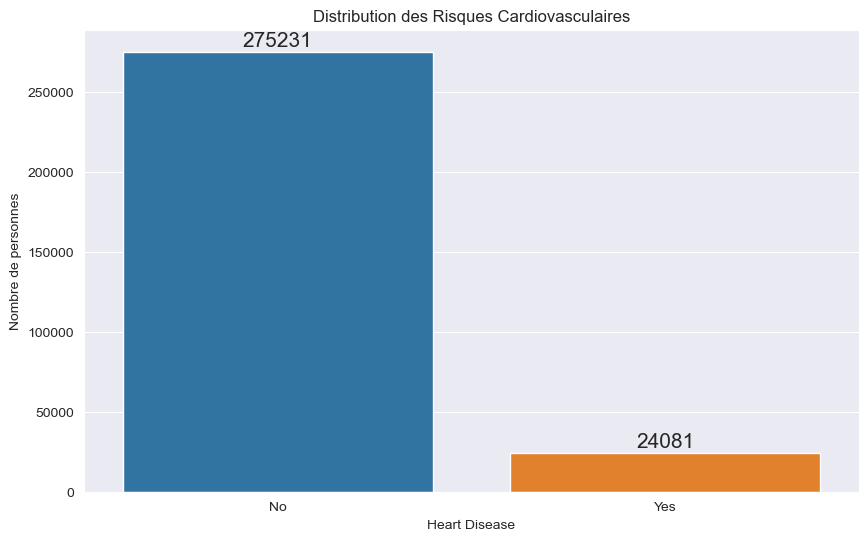

In [7]:
#Graphique de distribution du atribut cible (Heart_Disease) : histogramme
plt.figure(figsize=(10,6))
bars=sns.countplot(x='Heart_Disease', data=df)
plt.title('Distribution des Risques Cardiovasculaires')
plt.xlabel('Heart Disease')
plt.ylabel('Nombre de personnes')
for bar in bars.patches:
    bars.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
    
plt.show()



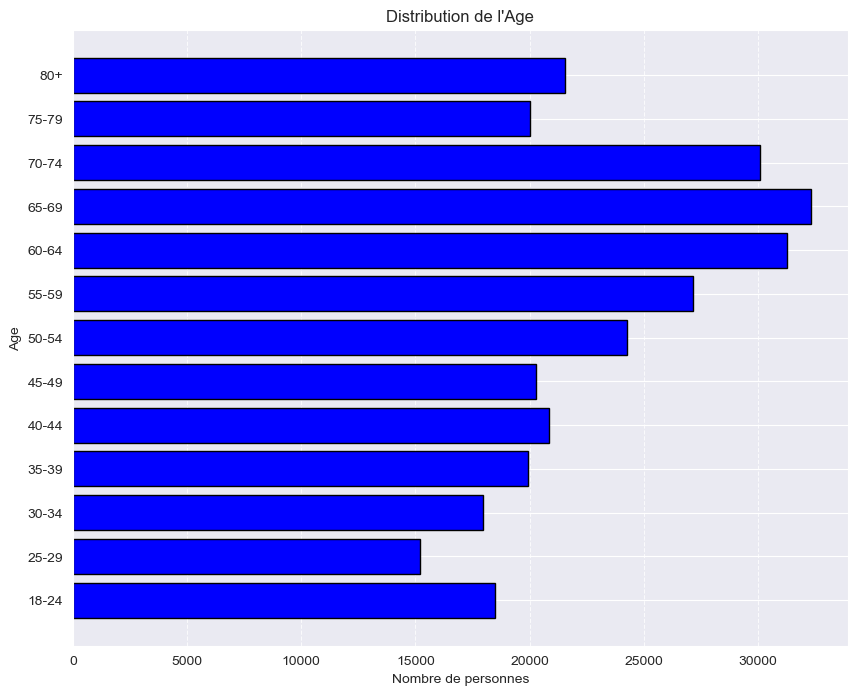

In [8]:
#Graphique de distribution de l'age
categories = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80+']
counts = df['Age_Category'].value_counts().reindex(categories, fill_value=0)
# Plot
plt.figure(figsize=(10, 8))
plt.barh(categories, counts, color='blue', edgecolor='black')
plt.xlabel('Nombre de personnes')
plt.ylabel('Age')
plt.title('Distribution de l\'Age')
plt.grid(axis='x', linestyle='--', alpha=0.8)
plt.show()

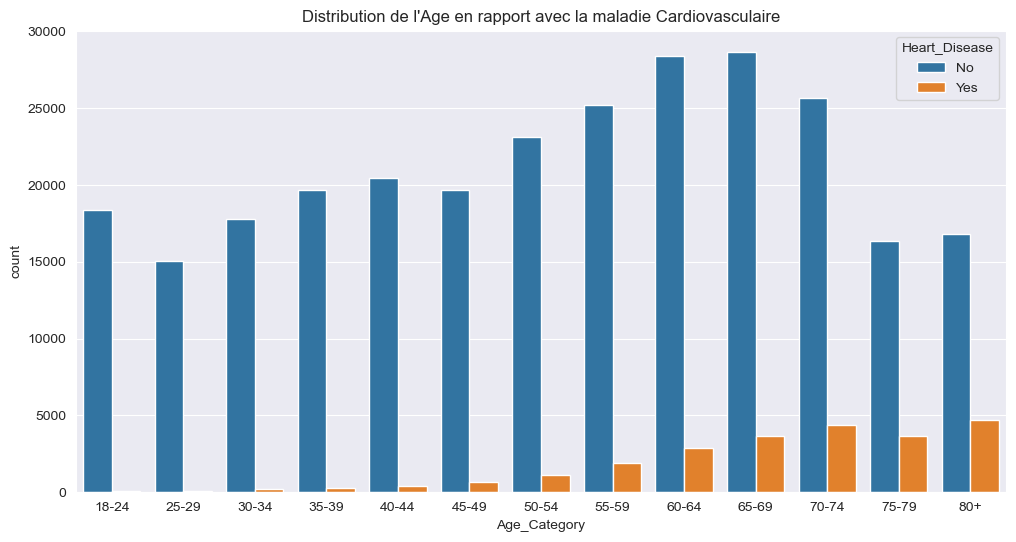

In [9]:
#Graphique de distribution de l'age en rapport avec la maladie cardiovasculaire
plt.figure(figsize=(12,6))
sns.countplot(x='Age_Category', data=df, hue='Heart_Disease', order=categories)
plt.title('Distribution de l\'Age en rapport avec la maladie Cardiovasculaire')
plt.show()



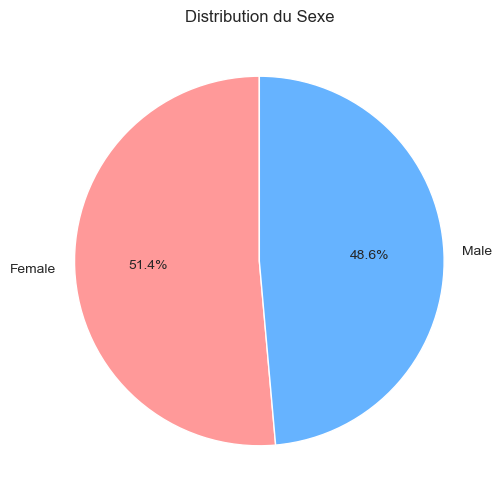

In [10]:
#Graphique de distribution du sexe : pie chart
plt.figure(figsize=(10,6))
df.Sex.value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Distribution du Sexe')
plt.ylabel('')
plt.show()


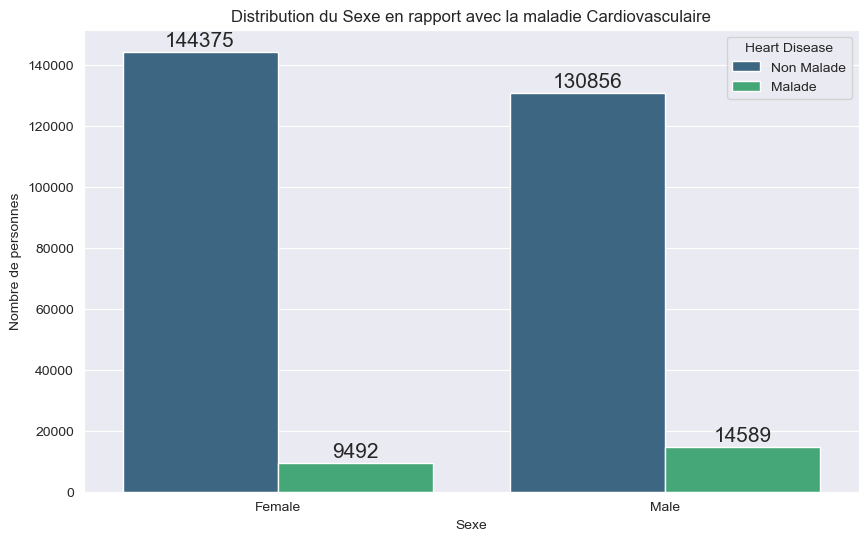

In [11]:
#Graphique de distribution du sexe en rapport avec la maladie cardiovasculaire
plt.figure(figsize=(10,6))

bars=sns.countplot(x='Sex',data=df,hue='Heart_Disease',palette='viridis')
plt.title('Distribution du Sexe en rapport avec la maladie Cardiovasculaire')
plt.xlabel('Sexe')
plt.ylabel('Nombre de personnes')
plt.legend(title='Heart Disease',labels=['Non Malade','Malade'])
for bar in bars.patches:
    bars.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

- People with rheumatoid arthritis (RA) have a 50% to 70% higher risk for cardiovascular disease than the general population.
- People with osteoarthritis (OA) face a 24% higher risk for cardiovascular disease than the general population.
- Nearly half of all adults with heart disease also have arthritis.

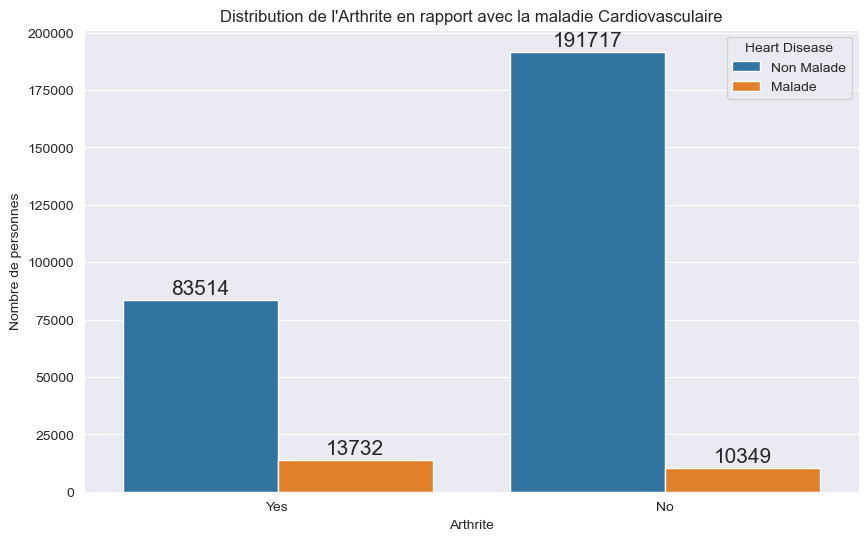

In [12]:
#Graphique de distribution de l'arthrite en rapport avec la maladie cardiovasculaire
plt.figure(figsize=(10,6))
bars= sns.countplot(x='Arthritis', data=df, hue='Heart_Disease')
plt.title('Distribution de l\'Arthrite en rapport avec la maladie Cardiovasculaire')
plt.xlabel('Arthrite')
plt.ylabel('Nombre de personnes')
plt.legend(title='Heart Disease',labels=['Non Malade','Malade'])
for bar in bars.patches:
    bars.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.show()


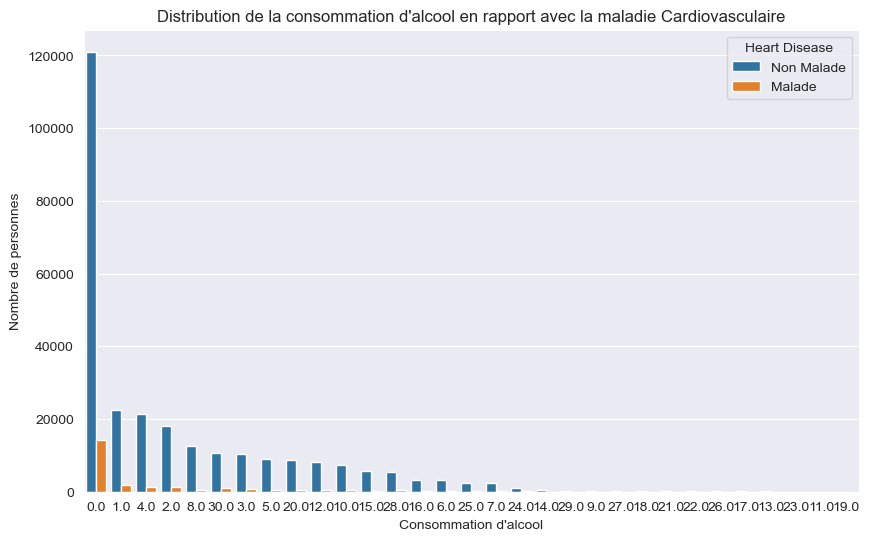

In [13]:
#Graphique de distribution de la consommation d'alcool en rapport avec la maladie cardiovasculaire
alcohol_order=df['Alcohol_Consumption'].value_counts().index
plt.figure(figsize=(10,6))
sns.countplot(x='Alcohol_Consumption', data=df, hue='Heart_Disease' ,order=alcohol_order)
plt.title('Distribution de la consommation d\'alcool en rapport avec la maladie Cardiovasculaire')
plt.xlabel('Consommation d\'alcool')
plt.ylabel('Nombre de personnes')
plt.legend(title='Heart Disease',labels=['Non Malade','Malade'])
plt.show()

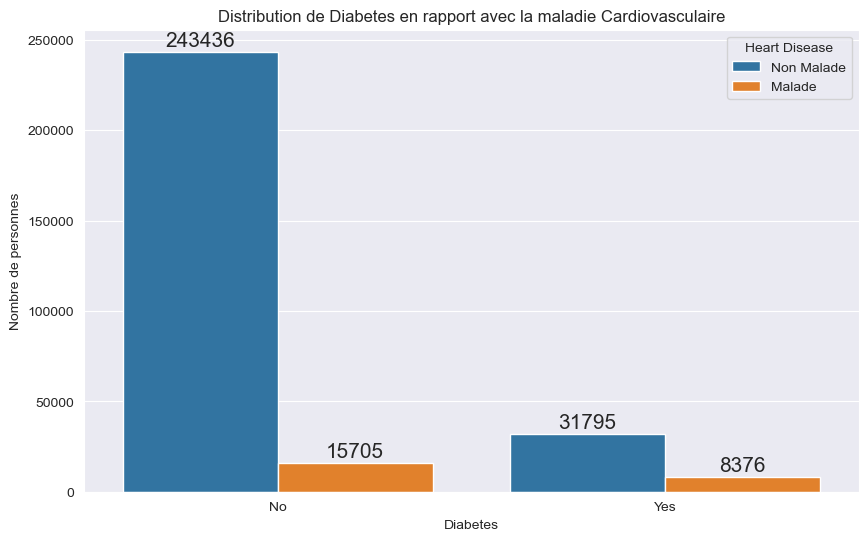

In [14]:
#Graphique de distribution de Diabetes en rapport avec la maladie cardiovasculaire
plt.figure(figsize=(10,6))
bars=sns.countplot(x='Diabetes', data=df, hue='Heart_Disease')
plt.title('Distribution de Diabetes en rapport avec la maladie Cardiovasculaire')
plt.xlabel('Diabetes')
plt.ylabel('Nombre de personnes')
plt.legend(title='Heart Disease',labels=['Non Malade','Malade'])
for bar in bars.patches:
    bars.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

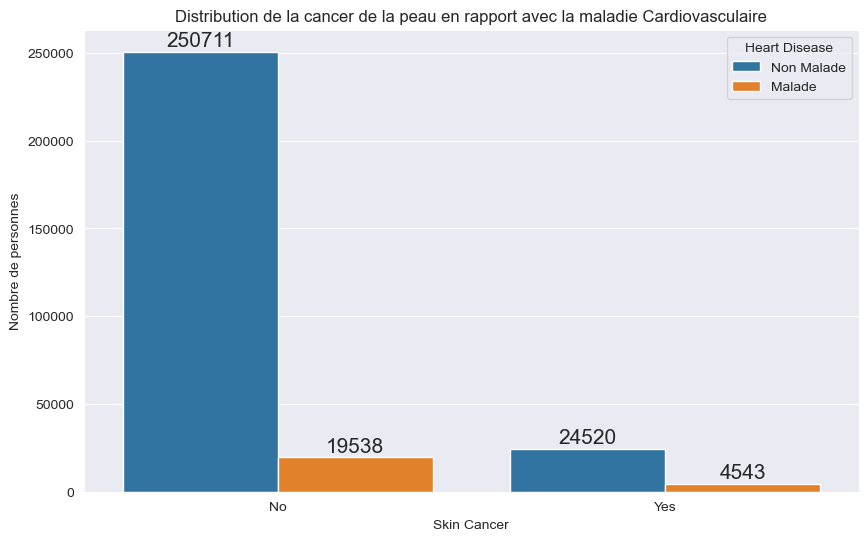

In [15]:
#Graphique de distribution de la cancer de la peau au rapport avec la maladie cardiovasculaire
plt.figure(figsize=(10,6))
bars=sns.countplot(x='Skin_Cancer', data=df, hue='Heart_Disease')
plt.title('Distribution de la cancer de la peau en rapport avec la maladie Cardiovasculaire')
plt.xlabel('Skin Cancer')
plt.ylabel('Nombre de personnes')
plt.legend(title='Heart Disease',labels=['Non Malade','Malade'])
for bar in bars.patches:
    bars.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

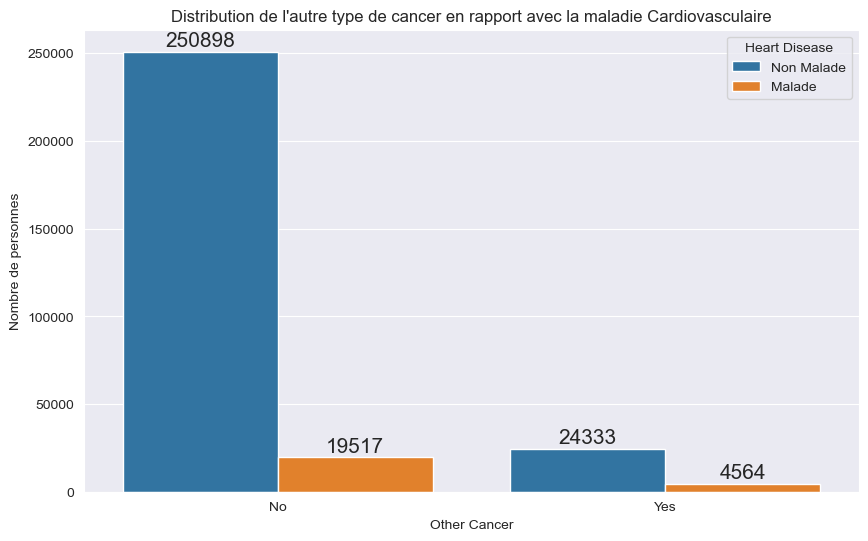

In [16]:
#Autre type de cancer en rapport avec la maladie cardiovasculaire
plt.figure(figsize=(10,6))
bars=sns.countplot(x='Other_Cancer', data=df, hue='Heart_Disease')
plt.title('Distribution de l\'autre type de cancer en rapport avec la maladie Cardiovasculaire')
plt.xlabel('Other Cancer')
plt.ylabel('Nombre de personnes')
plt.legend(title='Heart Disease',labels=['Non Malade','Malade'])
for bar in bars.patches:
    bars.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

##  Nettoyage des données


#### Données dupliquées

In [17]:
#Nombre de données dupliquées dans le dataset
duplicated = df.duplicated().sum()
print("Nombre de données dupliquées avant le nettoyage: ",duplicated)

Nombre de données dupliquées avant le nettoyage:  80


In [18]:
df.drop_duplicates(inplace=True)


In [19]:
#Vérification 
duplicated = df.duplicated().sum()
print("Nombre de données dupliquées après le nettoyage: ",duplicated)


Nombre de données dupliquées après le nettoyage:  0


#### Valeurs manquantes

In [20]:
#Valeur manquantes dans le dataset pour chaque attribut
df.isnull().sum()


General_Health                     0
Checkup                         9542
Exercise                        9542
Heart_Disease                   9542
Skin_Cancer                     9542
Other_Cancer                    9542
Depression                      9542
Diabetes                        9542
Arthritis                       9542
Sex                             9542
Age_Category                    9542
Height_(cm)                     9567
Weight_(kg)                     9543
BMI                             9542
Smoking_History                 9542
Alcohol_Consumption             9542
Fruit_Consumption               9542
Green_Vegetables_Consumption    9542
FriedPotato_Consumption         9543
dtype: int64

In [21]:
#Nombre de valeurs manquantes dans le dataset ou heart_disease= Yes
df_yes = df[df['Heart_Disease']=='Yes']
missing_values_yes = df_yes.isnull().sum().sum()
print("Nombre de valeurs manquantes dans le dataset ou heart_disease= Yes: ",missing_values_yes)


Nombre de valeurs manquantes dans le dataset ou heart_disease= Yes:  2


#### Remplacement des valeurs manquantes 
Effacer les valeurs manquantes.

In [22]:
#Supprimer les valeurs manquantes
df.dropna(inplace=True)

In [23]:
#Vérification
df.isnull().sum()


General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

## Transformation des données

#### Suppression des attributs inutiles
On va supprimer les attributs qui ne sont pas utiles pour la prédiction de la maladie cardiovasculaire , en se basant sur les graphiques de distribution des données et quelques recherches sur les risques cardiovasculaires. 

In [24]:
#Drop cancer de la peau et autre cancer 
df.drop(['Skin_Cancer','Other_Cancer'],axis=1,inplace=True)
#Drop Arthritis 
df.drop(['Arthritis'],axis=1,inplace=True)


### Normalisation des données 
Normaliser les données numériques pour les mettre à la même échelle.

In [25]:
#Change data type of Weight to numeric
df['Weight_(kg)'] = pd.to_numeric(df['Weight_(kg)'],errors='coerce')
#Recalculer le BMI 
df['BMI'] = df['Weight_(kg)']/(df['Height_(cm)']/100)**2

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical = ['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']
df[numerical] = scaler.fit_transform(df[numerical])



In [27]:
#Vérification
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Depression,Diabetes,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,Female,70-74,-1.945483,-2.388605,-2.165248,Yes,-0.624510,0.005722,0.059635,0.662762
1,Very Good,Within the past year,No,Yes,No,Yes,Female,70-74,-0.537054,-0.299786,-0.035450,No,-0.624510,0.005722,-1.012849,-0.268604
2,Very Good,Within the past year,Yes,No,No,Yes,Female,60-64,-0.724845,0.233109,0.730765,No,-0.138088,-0.717524,-0.811758,1.128445
3,Poor,Within the past year,Yes,Yes,No,Yes,Male,75-79,0.871375,0.467602,0.044184,No,-0.624510,0.005722,0.998059,0.197079
4,Good,Within the past year,No,No,No,No,Male,80+,1.904222,0.233109,-0.664430,Yes,-0.624510,-0.878246,-0.744728,-0.734287


#### Encodage des données catégorielles
Pour les données catégorielles, on va les encoder en utilisant la méthode de Label Encoding.

In [28]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
columns_object = df.select_dtypes(include=['object']).columns
for column in columns_object:
    df[column] = encoder.fit_transform(df[column])

In [29]:
#Vérification
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Depression,Diabetes,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,3,2,0,0,0,0,0,10,-1.945483,-2.388605,-2.165248,1,-0.624510,0.005722,0.059635,0.662762
1,4,4,0,1,0,1,0,10,-0.537054,-0.299786,-0.035450,0,-0.624510,0.005722,-1.012849,-0.268604
2,4,4,1,0,0,1,0,8,-0.724845,0.233109,0.730765,0,-0.138088,-0.717524,-0.811758,1.128445
3,3,4,1,1,0,1,1,11,0.871375,0.467602,0.044184,0,-0.624510,0.005722,0.998059,0.197079
4,2,4,0,0,0,0,1,12,1.904222,0.233109,-0.664430,1,-0.624510,-0.878246,-0.744728,-0.734287


In [30]:
df.dtypes


General_Health                    int32
Checkup                           int32
Exercise                          int32
Heart_Disease                     int32
Depression                        int32
Diabetes                          int32
Sex                               int32
Age_Category                      int32
Height_(cm)                     float64
Weight_(kg)                     float64
BMI                             float64
Smoking_History                   int32
Alcohol_Consumption             float64
Fruit_Consumption               float64
Green_Vegetables_Consumption    float64
FriedPotato_Consumption         float64
dtype: object

In [31]:
#Vérification des valeurs uniques
for column in df.columns:
    print(column, ":", df[column].unique())
    

General_Health : [3 4 2 1 0]
Checkup : [2 4 0 3 1]
Exercise : [0 1]
Heart_Disease : [0 1]
Depression : [0 1]
Diabetes : [0 1]
Sex : [0 1]
Age_Category : [10  8 11 12  9  5  0  2  7  6  3  4  1]
Height_(cm) : [-1.94548315 -0.53705431 -0.72484483  0.87137452  1.90422234  1.15306029
  0.40189824 -1.00653059  0.68358401 -1.28821636  1.62253657  1.3408508
 -0.06757804 -0.25536855  0.21410773 -1.75769264 -1.47600687  2.09201285
  2.37369862  3.31265117  2.56148913 -2.88443571 -3.35391199 -2.41495943
 -2.22716892 -2.6966452   2.84317489  4.43939424 -4.3867598   3.03096541
 -3.16612148 -4.57455031  4.25160373  5.00276578  5.47224206 -1.8515879
  0.58968876 -0.63094957 -0.81874008 -1.38211162 -1.66379738 -0.16147329
  0.12021248 -6.07687441 -0.3492638   1.81032708 -2.60274994  0.02631722
 -1.56990213  0.4957935   2.74927964 -2.32106417 -2.13327366 -1.1943211
 -1.10042585  1.52864131 -6.26466492 -4.76234082 -5.98297915  3.78212745
  5.19055629  1.05916503  3.96991796 -6.92193171  1.24695555 -4.2

#### Calibrage des données 


In [32]:
df_0 = df[df['Heart_Disease']==0]
df_1 = df[df['Heart_Disease']==1]
df_0 = df_0.sample(len(df_1), random_state=69)
df = pd.concat([df_0, df_1])
df = df.sample(frac=1, random_state=69).reset_index(drop=True)

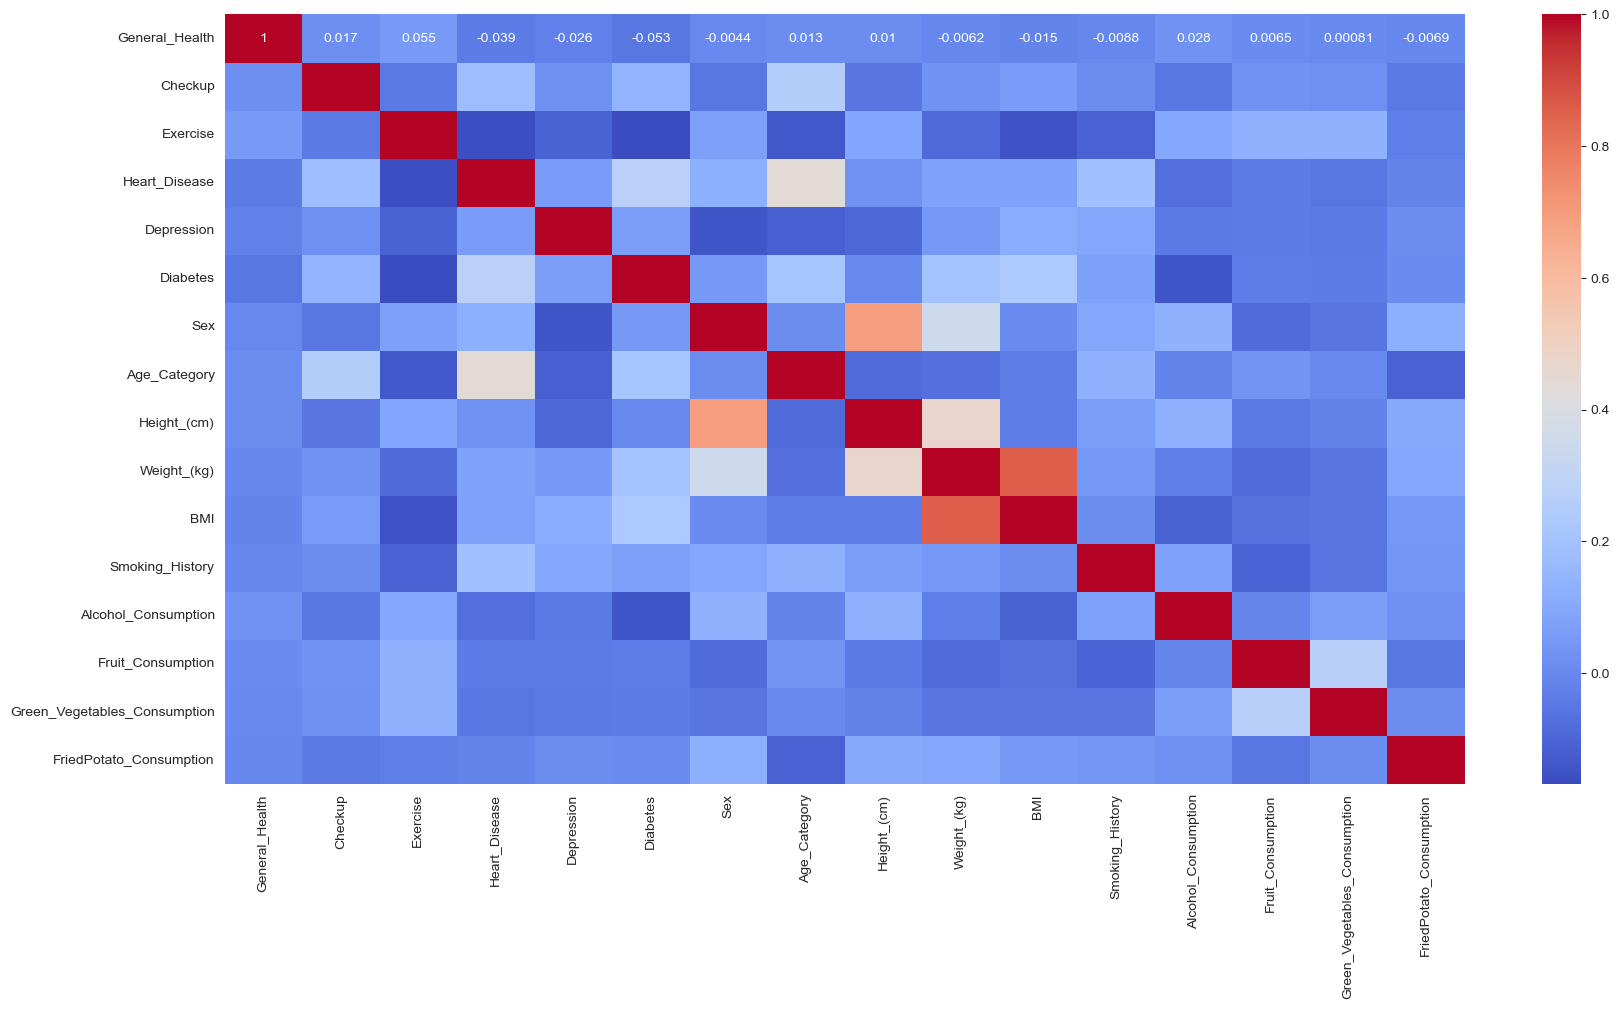

In [33]:
#Matrice de corrélation
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

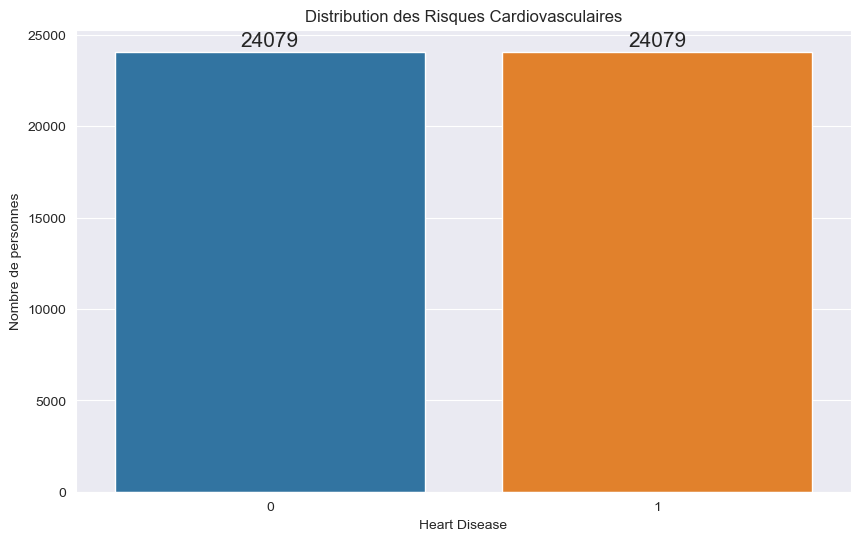

In [34]:
plt.figure(figsize=(10,6))
bars=sns.countplot(x='Heart_Disease', data=df)
plt.title('Distribution des Risques Cardiovasculaires')
plt.xlabel('Heart Disease')
plt.ylabel('Nombre de personnes')
for bar in bars.patches:
    bars.annotate(format(bar.get_height(), '.0f'),
                  (bar.get_x() + bar.get_width() / 2,
                   bar.get_height()), ha='center', va='center',
                  size=15, xytext=(0, 8),
                  textcoords='offset points')

plt.show()

In [35]:
#Save the cleaned data
df.to_csv('data/Cleaned_Cardiovascular_Diseases.csv',index=False)

##  Création et validation des modèles

### Division des données

In [36]:
data=pd.read_csv('data/Cleaned_Cardiovascular_Diseases.csv')

##### Atributs cible est : Heart_Disease

In [37]:
X = data.drop('Heart_Disease',axis=1)
y = data['Heart_Disease']

##### Division des données en données d'entrainement et de test (0.75 pour l'entrainement et 0.25 pour le test)

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=69)

In [39]:
#Vérification
print("X_train shape: ",X_train.shape)
print("X_test shape: ",X_test.shape)
print("y_train shape: ",y_train.shape)
print("y_test shape: ",y_test.shape)


X_train shape:  (36118, 15)
X_test shape:  (12040, 15)
y_train shape:  (36118,)
y_test shape:  (12040,)


### En utulisant Software Engineering best practices, on va créer des fonctions pour trainer et evaluer les modèles.



In [40]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt

# Fonction pour evaluer le modèle
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.show()
    #print the value of the confusion matrix
    print("Confusion Matrix: ",cm)

# Fonction pour afficher les courbes de Precision-Recall et ROC
def plot_curves(model, X_test, y_test):
    y_scores = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_scores)
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    plt.plot(recall, precision, label='Precision-Recall curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.show()
    plt.plot(fpr, tpr, label='ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

# Fonction pour entrainer et evaluer le modèle
def tune_hyperparameters(model, param_grid, X_train, y_train):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy',n_jobs=-1)
    grid_search.fit(X_train, y_train)
    print("Best parameters: ", grid_search.best_params_)
    print("Best score: ", grid_search.best_score_)
    return grid_search.best_estimator_

## KNN (K-Nearest Neighbors) 
- K (nombre de voisins) : 3 ,5 ,7 , 9 
- Mesure de distance : Euclidean, Manhattan

Best parameters:  {'metric': 'manhattan', 'n_neighbors': 9}
Best score:  0.7319898490870419
              precision    recall  f1-score   support

           0       0.75      0.71      0.73      6005
           1       0.73      0.76      0.74      6035

    accuracy                           0.74     12040
   macro avg       0.74      0.74      0.74     12040
weighted avg       0.74      0.74      0.74     12040



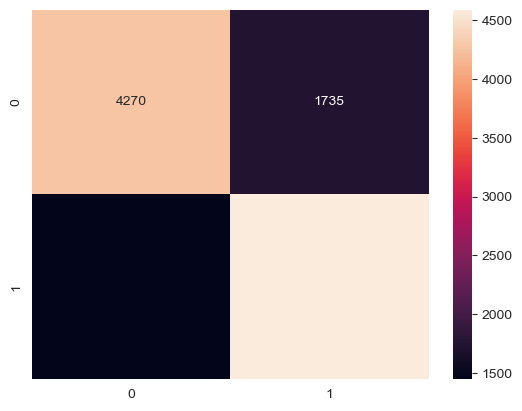

Confusion Matrix:  [[4270 1735]
 [1445 4590]]


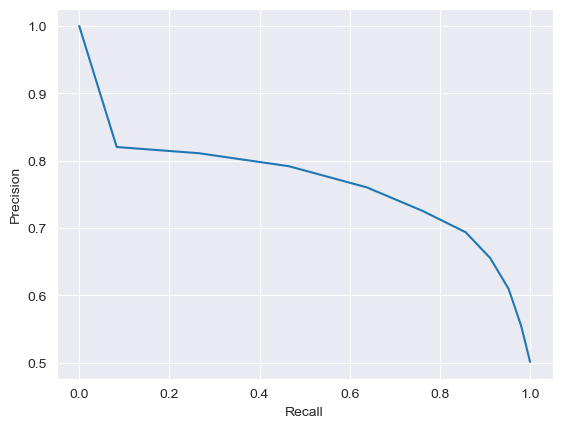

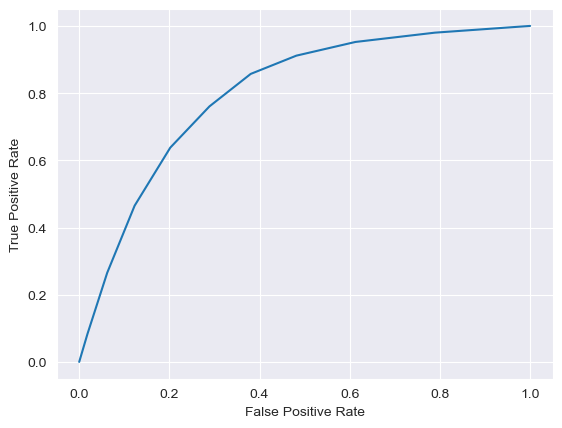

In [41]:
knn = KNeighborsClassifier()
knn_param_grid = {'n_neighbors': [3, 5, 7, 9], 'metric': ['euclidean', 'manhattan']}
knn_best = tune_hyperparameters(knn, knn_param_grid, X_train, y_train)
evaluate_model(knn_best, X_test, y_test)
plot_curves(knn_best, X_test, y_test)

In [42]:
#Save the best model for KNN
import joblib
joblib.dump(knn_best, 'models/knn_model.pkl')

['models/knn_model.pkl']

### Arbres de décision
- Criterion : gini, entropy

Best parameters:  {'criterion': 'entropy'}
Best score:  0.6620799474853385
              precision    recall  f1-score   support

           0       0.66      0.66      0.66      6005
           1       0.66      0.66      0.66      6035

    accuracy                           0.66     12040
   macro avg       0.66      0.66      0.66     12040
weighted avg       0.66      0.66      0.66     12040



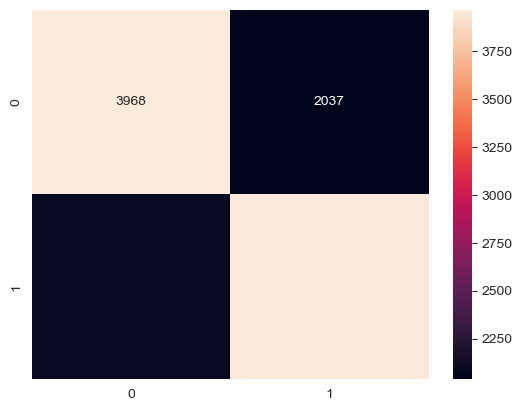

Confusion Matrix:  [[3968 2037]
 [2078 3957]]


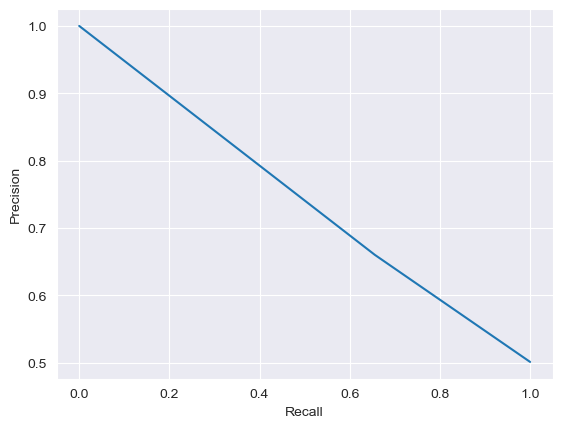

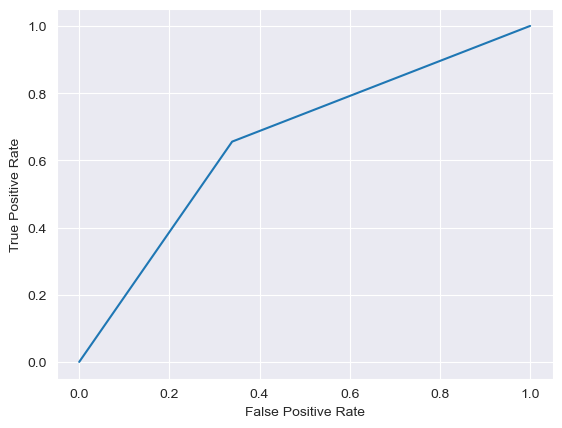

In [43]:
dt = DecisionTreeClassifier()
dt_param_grid = {'criterion': ['gini', 'entropy']}
dt_best = tune_hyperparameters(dt, dt_param_grid, X_train, y_train)
evaluate_model(dt_best, X_test, y_test)
plot_curves(dt_best, X_test, y_test)


In [44]:
#Save the best model for Decision Tree
joblib.dump(dt_best, 'models/dt_model.pkl')

['models/dt_model.pkl']

### Régression Logistique
- max_iter : 100, 200, 300
- solver : lbfgs, liblinear, newton-cg,sag, saga

Best parameters:  {'max_iter': 100, 'solver': 'lbfgs'}
Best score:  0.7371119450616794
              precision    recall  f1-score   support

           0       0.76      0.71      0.73      6005
           1       0.73      0.77      0.75      6035

    accuracy                           0.74     12040
   macro avg       0.74      0.74      0.74     12040
weighted avg       0.74      0.74      0.74     12040



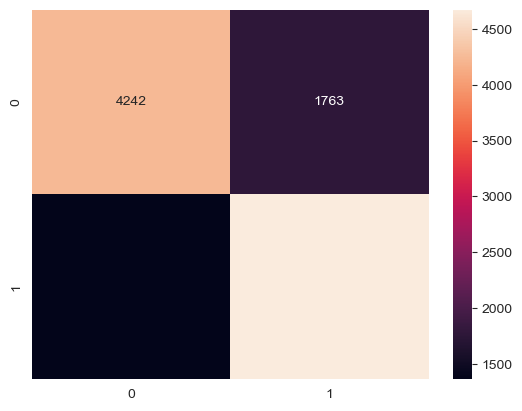

Confusion Matrix:  [[4242 1763]
 [1362 4673]]


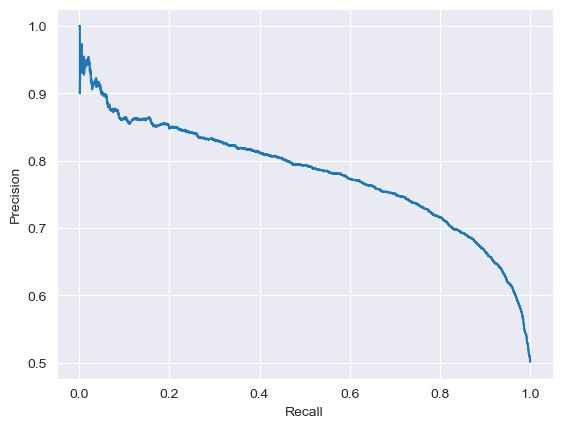

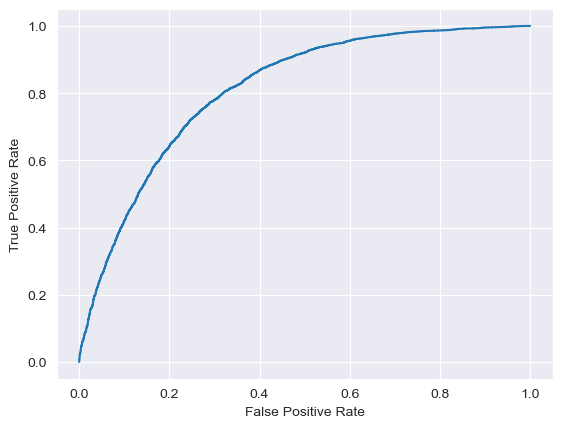

In [45]:
lr= LogisticRegression()
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
lr_param_grid = {
    'max_iter': [100, 200, 300, 1000, 2000, 3000],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']
}
lr_best = tune_hyperparameters(lr, lr_param_grid, X_train_scaled, y_train)
evaluate_model(lr_best, X_test_scaled, y_test)
plot_curves(lr_best, X_test_scaled, y_test)

In [46]:
#Save the best model for Logistic Regression
joblib.dump(lr_best, 'models/lr_model.pkl')

['models/lr_model.pkl']

### SVM (Support Vector Machine)
- C : 100, 10, 1.0, 0.1, 0.001
- kernel : linear, poly, rbf, sigmoid

Best parameters:  {'C': 1.0, 'kernel': 'rbf'}
Best score:  0.7470515965901346
              precision    recall  f1-score   support

           0       0.79      0.69      0.74      6005
           1       0.72      0.82      0.77      6035

    accuracy                           0.75     12040
   macro avg       0.76      0.75      0.75     12040
weighted avg       0.76      0.75      0.75     12040



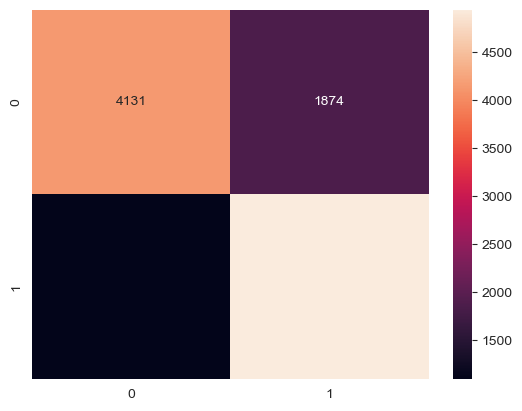

Confusion Matrix:  [[4131 1874]
 [1097 4938]]


AttributeError: predict_proba is not available when  probability=False

In [47]:
sm= SVC()
sm_param_grid = {
    'C': [100, 10, 1.0, 0.1, 0.001],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}
sm_best = tune_hyperparameters(sm, sm_param_grid, X_train_scaled, y_train)
evaluate_model(sm_best, X_test_scaled, y_test)
plot_curves(sm_best, X_test_scaled, y_test)

# Conclusion


# comparaison des modèles 


KNN
              precision    recall  f1-score   support

           0       0.75      0.71      0.73      6005
           1       0.73      0.76      0.74      6035

    accuracy                           0.74     12040
   macro avg       0.74      0.74      0.74     12040
weighted avg       0.74      0.74      0.74     12040



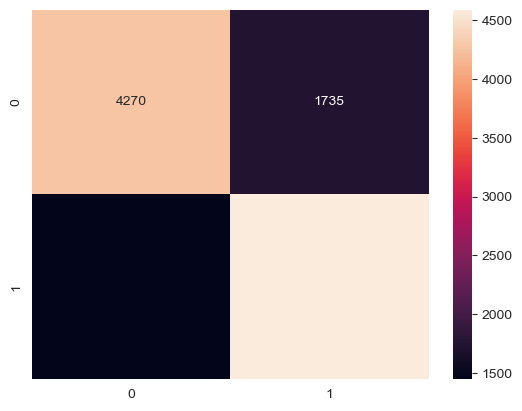

Confusion Matrix:  [[4270 1735]
 [1445 4590]]
Decision Tree
              precision    recall  f1-score   support

           0       0.66      0.66      0.66      6005
           1       0.66      0.66      0.66      6035

    accuracy                           0.66     12040
   macro avg       0.66      0.66      0.66     12040
weighted avg       0.66      0.66      0.66     12040



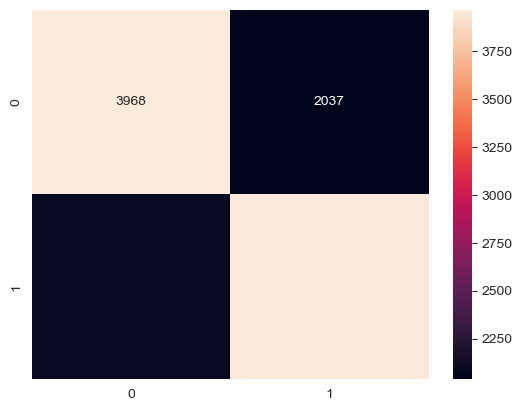

Confusion Matrix:  [[3968 2037]
 [2078 3957]]
Logistic Regression
              precision    recall  f1-score   support

           0       0.76      0.71      0.73      6005
           1       0.73      0.77      0.75      6035

    accuracy                           0.74     12040
   macro avg       0.74      0.74      0.74     12040
weighted avg       0.74      0.74      0.74     12040



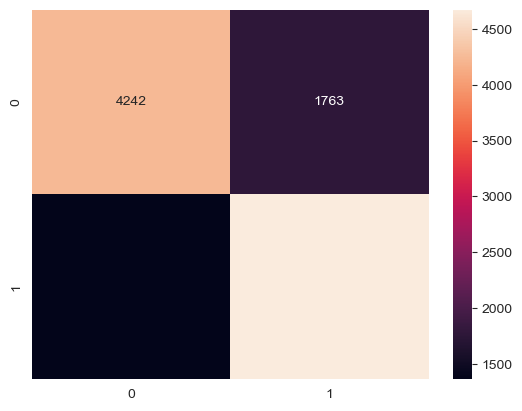

Confusion Matrix:  [[4242 1763]
 [1362 4673]]
SVM
              precision    recall  f1-score   support

           0       0.79      0.69      0.74      6005
           1       0.72      0.82      0.77      6035

    accuracy                           0.75     12040
   macro avg       0.76      0.75      0.75     12040
weighted avg       0.76      0.75      0.75     12040



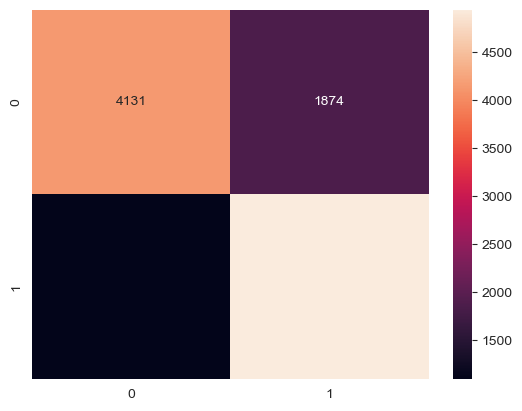

Confusion Matrix:  [[4131 1874]
 [1097 4938]]


['models/svm_model.pkl']

In [48]:
#KNN 
knn = joblib.load('models/knn_model.pkl')
print("KNN")
#Evaluate the model
evaluate_model(knn, X_test, y_test)
#Arbre de décision
dt = joblib.load('models/dt_model.pkl')
print("Decision Tree")
#Evaluate the model
evaluate_model(dt, X_test, y_test)
#Régression Logistique
lr = joblib.load('models/lr_model.pkl')
print("Logistic Regression")
#Evaluate the model
evaluate_model(lr, X_test_scaled, y_test)
#SVM
sm = SVC(kernel='rbf', C=1.0)
sm.fit(X_train_scaled, y_train)
print("SVM")
#Evaluate the model
evaluate_model(sm, X_test_scaled, y_test)
joblib.dump(sm, 'models/svm_model.pkl')


## Le meilleur modèle est le modèle SVM avec un kernel rbf et C=1.0 

In [49]:
#save the best model
joblib.dump(sm, 'models/best_model.pkl')

['models/best_model.pkl']